# 4.1 欠測データへの対処

In [27]:
import pandas as pd
from io import StringIO

# サンプルデータを作成
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# サンプルデータを読み込む
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [28]:
# 各特徴量の欠測値をカウント
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [29]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

## 4.1.1 欠測値を持つサンプル/ 特徴量を取り除く

In [30]:
# 欠測値を含む行を削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [31]:
# 欠測値を含む列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [32]:
# すべての列がNaNである行だけを削除
df.dropna(how='all')

# 非NaN値が４つ未満の行を削除
df.dropna(thresh=4)

# 特定列（この場合は'c')にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## 4.1.2 欠測値を補完する

In [33]:
from sklearn.preprocessing import Imputer

# 欠測値補完のインスタンスを生成（平均値補完）
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)

# データを適合
imr = imr.fit(df)

# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

# 4.2 カテゴリデータの処理

In [34]:
# サンプルデータを生成（Tシャツの色・サイズ・価格・クラスラベル）
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])

# 列名を設定
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## 4.2.1 順序特徴量のマッピング

In [35]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

# Tシャツのサイズに整数を変換
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## 4.2.2 クラスラベルのエンコーディング

In [36]:
import numpy as np

# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [37]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [38]:
# 整数とクラスラベルを対応させるディクショナリを作成
inv_class_mapping = {v: k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [39]:
# 整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [40]:
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダのインスタンスを作成
class_le = LabelEncoder()

# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [41]:
# クラルラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## 4.2.3 名義特徴量でのone-hotエンコーディング

In [42]:
# Tシャツの色、サイズ、価格を抽出
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder

# one-hot エンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])
# one-hotエンコーディングを実行
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [44]:
# one-hot エンコーディングを実行
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# 4.3 データセットをトレーニングデータセットとテストデータセットに分割する

In [45]:
# wineデータセットを読み込む
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)

# 列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                    'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                    'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline']

# クラスラベルを表示
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [46]:
# wineデータセットの先頭5行を表示
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
from sklearn.cross_validation import train_test_split

# 特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# print(X)
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# 4.4 特徴量の尺度を揃える

In [48]:
from sklearn.preprocessing import MinMaxScaler

# min-maxスケーリングのインスタンスを生成
mms = MinMaxScaler()

# トレーニングデータをスケーリング
X_train_norm = mms.fit_transform(X_train)

# テストデータをスケーリング
X_test_norm = mms.transform(X_test)

In [49]:
from sklearn.preprocessing import StandardScaler

# 標準化のインスタンスを生成（平均=0, 標準偏差=1に変換）
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
#print(X_train_std)

# 4.5 有益な特徴量の選択
## 4.5.1 L1正則化による疎な解

In [50]:
from sklearn.linear_model import LogisticRegression

# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty='l1')

# L1正則化ロジスティック回帰のインスタンスを生成（逆正則化パラメータC=0.1)
lr = LogisticRegression(penalty='l1', C=0.1)

# トレーニングデータに適合
lr.fit(X_train_std, y_train)

# トレーニングデータに対する正解率の表示
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.983870967742


In [51]:
# テストデータに対する正解率の表示
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.981481481481


In [52]:
# 切片の表示
lr.intercept_

array([-0.38383198, -0.15813542, -0.7003545 ])

In [53]:
# 重み係数の表示
lr.coef_

array([[ 0.28018425,  0.        ,  0.        , -0.02799953,  0.        ,
         0.        ,  0.71013297,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23603138],
       [-0.64376106, -0.0689413 , -0.05718065,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92723243,
         0.05982638,  0.        , -0.37100815],
       [ 0.        ,  0.06138124,  0.        ,  0.        ,  0.        ,
         0.        , -0.63696813,  0.        ,  0.        ,  0.49844808,
        -0.35814318, -0.57037863,  0.        ]])

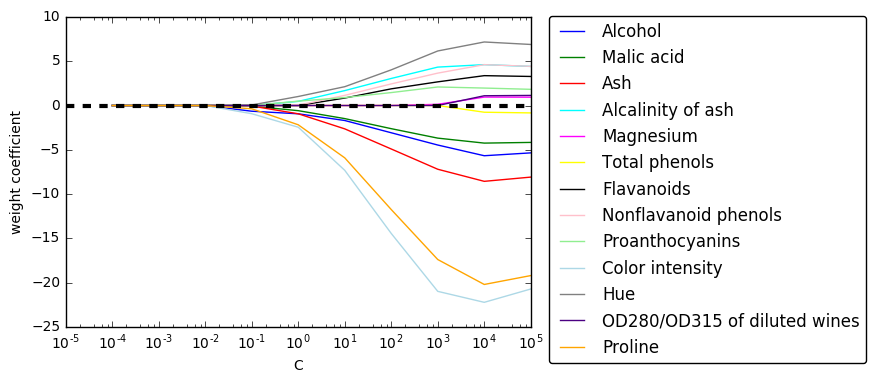

In [67]:
import matplotlib.pyplot as plt

# 描画の準備
fig = plt.figure()
ax = plt.subplot(111)

# 各係数の色のリスト
colors=['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']

# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []

# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4, 6):
    lr =  LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
# 重み係数をNumPy配列に変換
weights=np.array(weights)

#print(weights)

# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]) , colors):
    # 横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
# y=0に黒い波線を弾く
plt.axhline(0, color='black', linestyle='--', linewidth=3)

# 横軸の範囲の設定
plt.xlim([10**(-5), 10**5])

# 軸のラベルの設定
plt.ylabel('weight coefficient')
plt.xlabel('C')

# 横軸を対数スケールに設定
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()


## 4.5.2 逐次特徴選択アルゴリズム

In [70]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

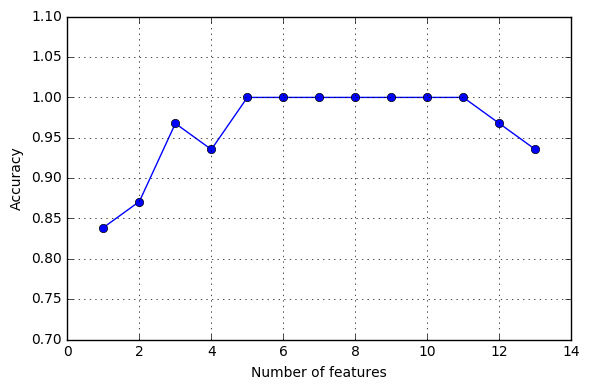

In [72]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# k近傍分類器のインスタンスを生成（近傍点数=2)
knn = KNeighborsClassifier(n_neighbors=2)

# 逐次後退選択のインスタンスを生成（特徴量の個数が1になるまで特徴量を選択)
sbs = SBS(knn, k_features=1)

# 逐次後退選択を実行
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()


In [73]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [74]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [75]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.925925925926


# 4.6 ランダムフォレストで特徴量の重要度にアクセスする

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


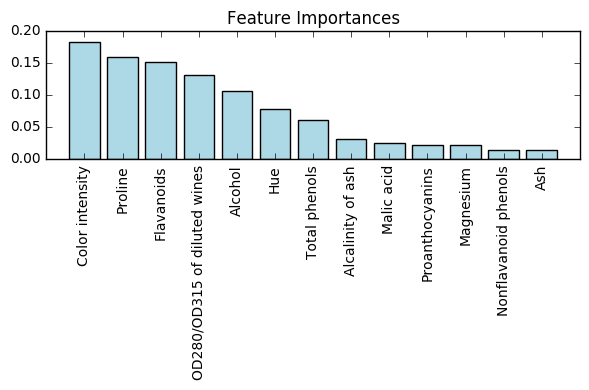

In [77]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()


In [79]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

X_selected.shape

(124, 3)

In [80]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
